In [294]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline





In [295]:
#convert MNIST Image  flies a tesnor of 4-dimensional  (images ,heights,width,colour chanels)
transform  = transforms.ToTensor()

In [296]:
#train the data
train_data = datasets.MNIST(root='/CNN.data',train =True,download=True,transform=transform)

In [297]:
#test the data
test_data = datasets.MNIST(root='/CNN.data',train =False,download=True,transform=transform)

In [298]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /CNN.data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [299]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /CNN.data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [300]:
print(DataLoader)

<class 'torch.utils.data.dataloader.DataLoader'>


In [301]:
#lets create the small batch size for the images ,lets say 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)


In [302]:
#lets define our convolutional neural network
#Describe the convolutional layer and what its doing (@ convolutional layers)\
#This is just a example in the video we will build out the actual model
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)
# conv3 = nn.Conv2d()




In [303]:
#Grab 1 MNIST reord/iimage
for i,(X_Train,y_train) in enumerate(train_data):
  break

In [304]:
X_Train.shape # ( one image is onsist of 28 by 28 pixels )

torch.Size([1, 28, 28])

In [305]:
x = X_Train.view

In [306]:
#Perfoem our first convolution
x = F.relu(conv1(X_Train.view(-1,1,28,28)))


In [307]:
x

tensor([[[[0.0673, 0.0673, 0.0673,  ..., 0.0673, 0.0673, 0.0673],
          [0.0673, 0.0673, 0.0673,  ..., 0.0673, 0.0673, 0.0673],
          [0.0673, 0.0673, 0.0673,  ..., 0.0673, 0.0673, 0.0673],
          ...,
          [0.0673, 0.0673, 0.0000,  ..., 0.0673, 0.0673, 0.0673],
          [0.0673, 0.0673, 0.0000,  ..., 0.0673, 0.0673, 0.0673],
          [0.0673, 0.0673, 0.0673,  ..., 0.0673, 0.0673, 0.0673]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.1284, 0.1284, 0.1284,  ..., 0.1284, 0.1284, 0.1284],
          [0.1284, 0.1284, 0.1284,  ..., 0.1284, 0.1284, 0.1284],
          [0.1284, 0.1284, 0.1284,  ..., 0

In [308]:
x.shape

torch.Size([1, 6, 26, 26])

In [309]:
#Pass through the polling layer
x = F.max_pool2d(x,2,2) #kernal od 2 and stride 2

In [310]:
x.shape

torch.Size([1, 6, 13, 13])

In [311]:
#Do your second convolutional layer
x = F.relu(conv2(x))


In [312]:
x.shape


torch.Size([1, 16, 11, 11])

In [313]:
x = F.max_pool2d(x,2,2)

In [314]:
x.shape

torch.Size([1, 16, 5, 5])

In [315]:
class convolutionalneural(nn.Module):
  def __init__(self):
    super(convolutionalneural,self).__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    #fully connected layer
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)  # 2x2 kernel

    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)  # 2x2 kernel

    x = x.view(-1, 16 * 5 * 5)  # Flatten the tensor

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.log_softmax(x, dim=1)



In [316]:
#Create a instance over module
torch.manual_seed(41)
model = convolutionalneural()
model

convolutionalneural(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [317]:
#loss function optimizer
criterian = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr= 0.001)#smaller the learning rate get the longer  to its train




In [318]:
import time
start_time = time.time()

# Define training parameters
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# Training loop
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    # Training phase
    # model.train()  # Set model to training mode
    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1

        # Forward pass
        y_pred = model(X_train)
        loss = criterian(y_pred, y_train)

        # Compute accuracy
        predicted = torch.max(y_pred, 1)[1]  # Get predicted class indices
        batch_corr = (predicted == y_train).sum().item()  # Convert tensor to integer
        trn_corr += batch_corr

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print loss at every 600 batches
        if b % 600 == 0:
            print(f'Epoch: {i}, Batch: {b}, Loss: {loss.item()}')

    # Store training loss and accuracy
    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Testing phase
    # model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # No gradients needed during testing
        for b,(X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val, 1)[1]
            tst_corr += (predicted == y_test).sum()

        # Store test loss and accuracy
        loss = criterian(y_val, y_test)
        test_losses.append(loss)
        test_correct.append(tst_corr)


        # Compute test loss
        loss = criterian(y_val, y_test)
        test_losses.append(loss.item())
        test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f'Total time: {total/60} minutes !')


Epoch: 0, Batch: 600, Loss: 0.1623610556125641
Epoch: 0, Batch: 1200, Loss: 0.1502392590045929
Epoch: 0, Batch: 1800, Loss: 0.4744560718536377
Epoch: 0, Batch: 2400, Loss: 0.14238706231117249
Epoch: 0, Batch: 3000, Loss: 0.007758188061416149
Epoch: 0, Batch: 3600, Loss: 0.3836284875869751
Epoch: 0, Batch: 4200, Loss: 0.0038223876617848873
Epoch: 0, Batch: 4800, Loss: 0.0021286322735249996
Epoch: 0, Batch: 5400, Loss: 0.0569545142352581
Epoch: 0, Batch: 6000, Loss: 0.00038789428072050214
Epoch: 1, Batch: 600, Loss: 0.005851339548826218
Epoch: 1, Batch: 1200, Loss: 0.3855525553226471
Epoch: 1, Batch: 1800, Loss: 0.004819948226213455
Epoch: 1, Batch: 2400, Loss: 0.003216963727027178
Epoch: 1, Batch: 3000, Loss: 0.0332382395863533
Epoch: 1, Batch: 3600, Loss: 0.5372857451438904
Epoch: 1, Batch: 4200, Loss: 0.04561494290828705
Epoch: 1, Batch: 4800, Loss: 0.0007510822033509612
Epoch: 1, Batch: 5400, Loss: 0.0001173773780465126
Epoch: 1, Batch: 6000, Loss: 0.14201366901397705
Epoch: 2, Batch

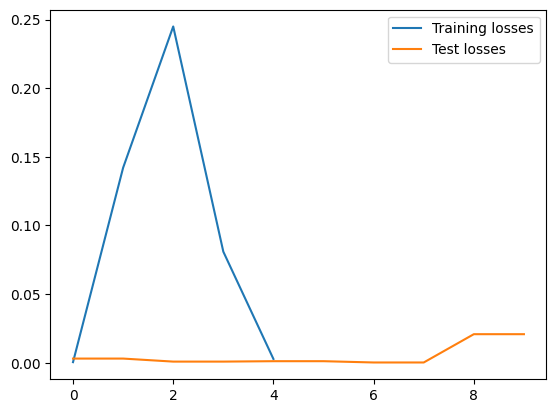

In [334]:
# If train_losses and test_losses contain floats, no need to use .item()
plt.plot(train_losses, label="Training losses")  # Correct label
plt.plot(test_losses, label="Test losses")  # Correct label
plt.legend()  # Show legend
plt.show()  # Display the plot


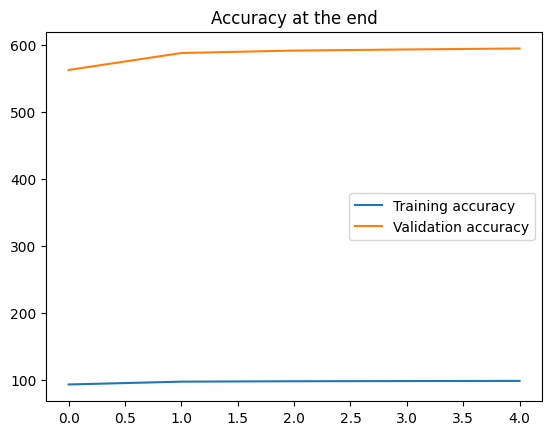

In [337]:
plt.plot([t/600 for t in train_correct], label="Training accuracy")
plt.plot([t/100 for t in train_correct], label="Validation accuracy")
plt.title('Accuracy at the end')
plt.legend()


In [338]:
test_load_everythings = DataLoader(test_data, batch_size=10000, shuffle=False)


In [339]:
with torch.no_grad():
    correct = 0
    for b, (X_test, y_test) in enumerate(test_load_everythings):
        y_val = model(X_test)

In [341]:
predicted = torch.max(y_val, 1)[1]
correct += (predicted == y_test).sum()

In [345]:
#old for correct
correct.item()/len(test_data)*100

197.14000000000001

In [354]:
#Grab an image
test_data[1978] #tesnor with the image in

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [355]:
#Grab just the data
test_data[1978][0]



tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [356]:
test_data[1978][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

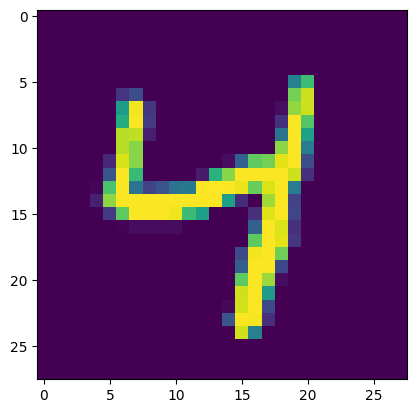

In [357]:
plt.imshow(test_data[1978][0].reshape(28,28))

In [358]:
#Lets past thisimage through the model
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[1978][0].view(1,1,28,28))#batch size of 1 color chenel 28x28 image

In [359]:
new_prediction

tensor([[-2.4992e+01, -1.8860e+01, -2.4744e+01, -3.0158e+01, -4.7684e-07,
         -2.1318e+01, -2.2632e+01, -2.0485e+01, -2.1817e+01, -1.4484e+01]])

In [360]:
new_prediction.argmax()

tensor(4)